In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [413]:
bank=pd.read_csv('bank_marketing_part1_Data.csv')

In [414]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [415]:
bank.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [416]:
bank.shape

(210, 7)

In [417]:
bank.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [418]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [419]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [420]:
bank.duplicated().sum()

0

In [421]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


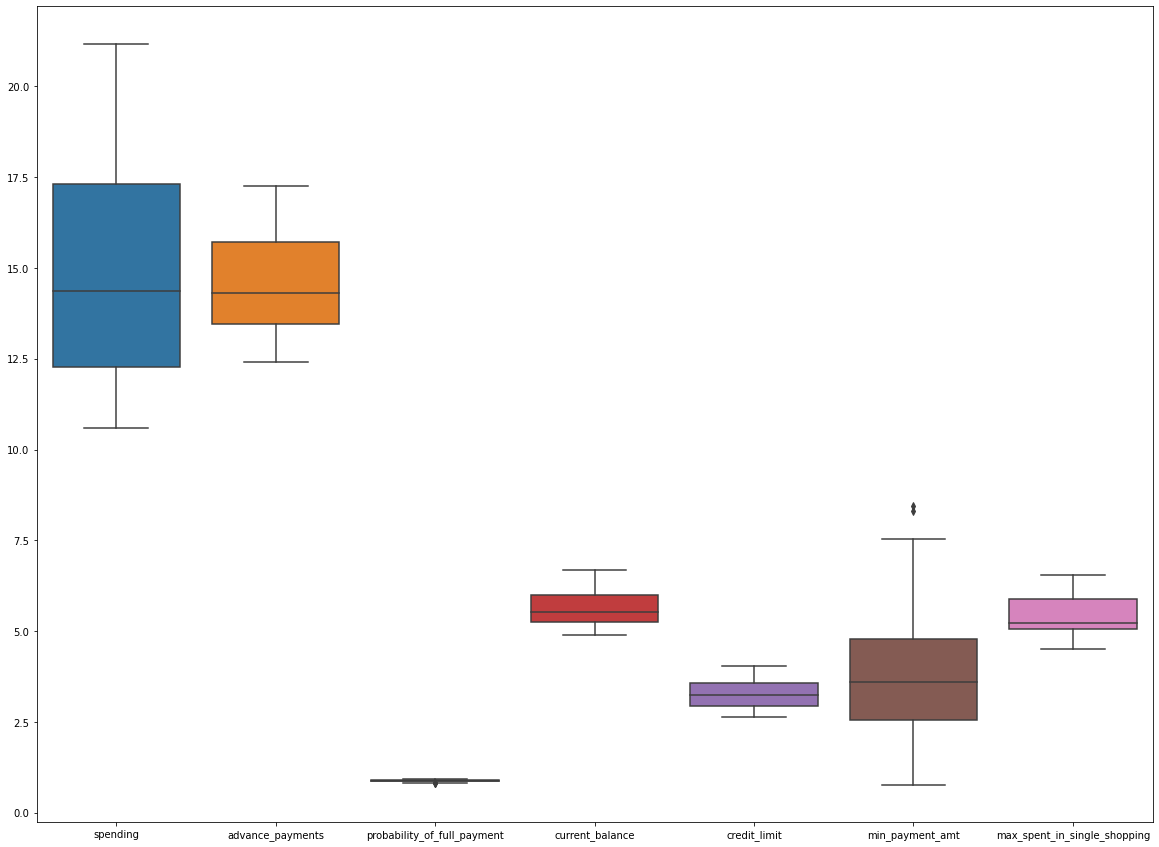

In [422]:
plt.figure(figsize=(20,15))
sns.boxplot(data=bank);

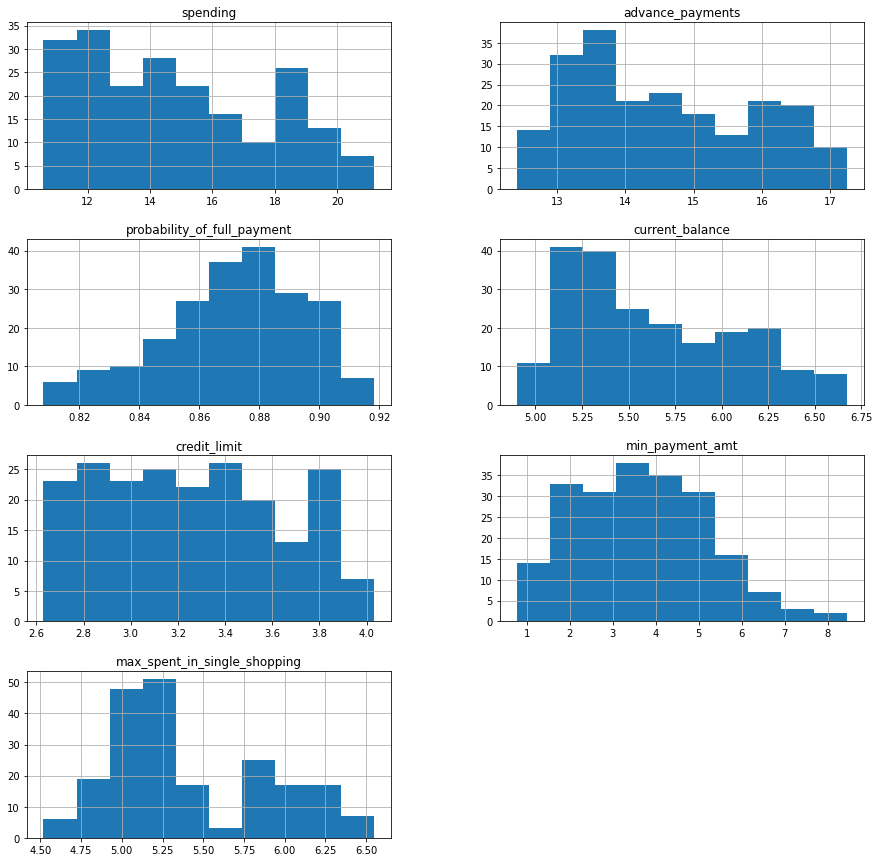

In [423]:
bank.hist(figsize=(15,15),layout=(4,2));

In [424]:
bank.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

In [425]:
from scipy.stats import shapiro
for i in bank.columns:
    print(shapiro(bank[i]))

ShapiroResult(statistic=0.9325932264328003, pvalue=2.9475659246713803e-08)
ShapiroResult(statistic=0.9361613392829895, pvalue=5.901836885868761e-08)
ShapiroResult(statistic=0.9730417132377625, pvalue=0.00046959755127318203)
ShapiroResult(statistic=0.943798840045929, pvalue=2.8279683306209336e-07)
ShapiroResult(statistic=0.960623025894165, pvalue=1.4444454791373573e-05)
ShapiroResult(statistic=0.9836222529411316, pvalue=0.01543912198394537)
ShapiroResult(statistic=0.9249410033226013, pvalue=7.141085056616703e-09)


In [426]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(bank[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(bank[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=bank[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 


Distribution of spending
----------------------------------------------------------------------------


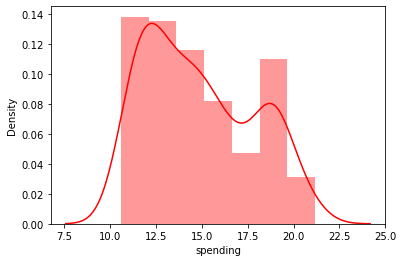

BoxPlot of spending
----------------------------------------------------------------------------


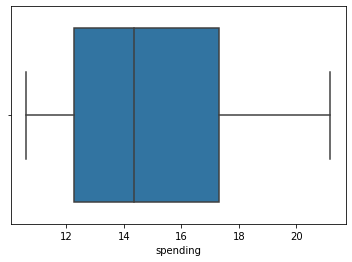

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 


Distribution of advance_payments
----------------------------------------------------------------------------


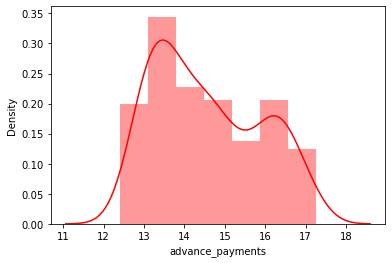

BoxPlot of advance_payments
----------------------------------------------------------------------------


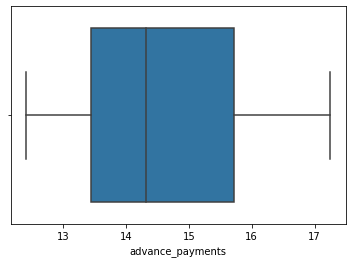

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 


Distribution of probability_of_full_payment
----------------------------------------------------------------------------


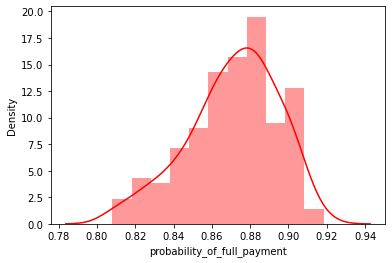

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


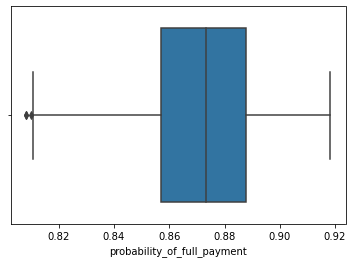

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 


Distribution of current_balance
----------------------------------------------------------------------------


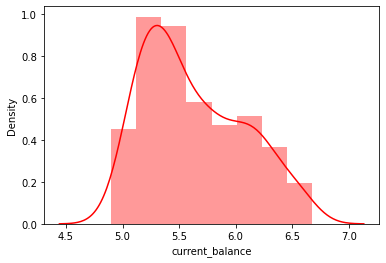

BoxPlot of current_balance
----------------------------------------------------------------------------


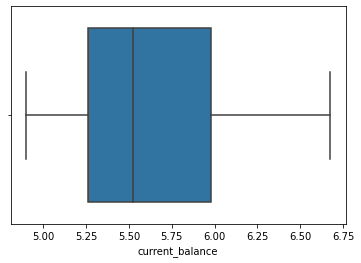

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 


Distribution of credit_limit
----------------------------------------------------------------------------


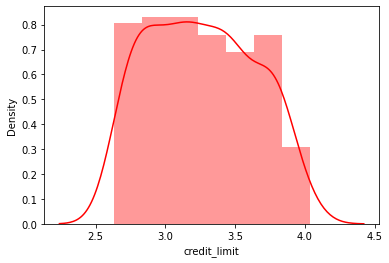

BoxPlot of credit_limit
----------------------------------------------------------------------------


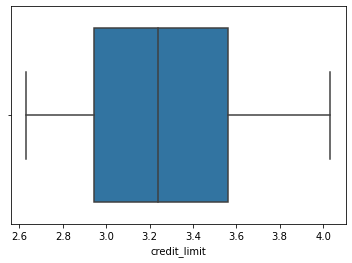

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 


Distribution of min_payment_amt
----------------------------------------------------------------------------


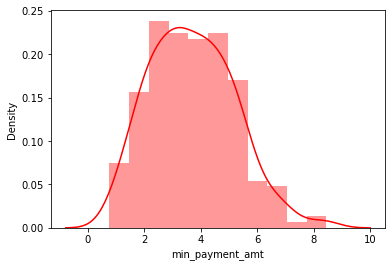

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


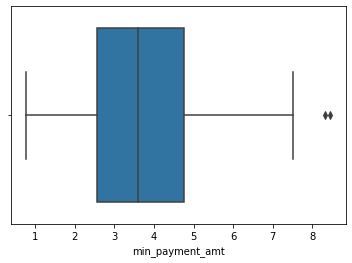

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 


Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


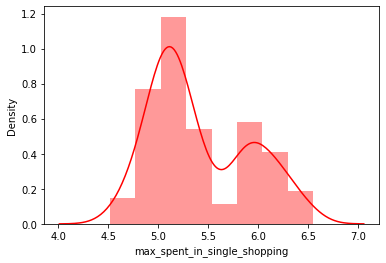

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


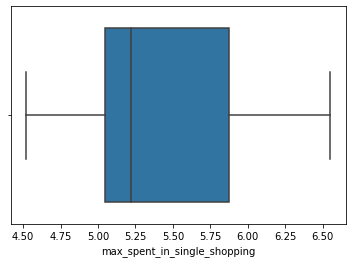

In [427]:
for i in bank.columns:
    univariateAnalysis_numeric(i,7)

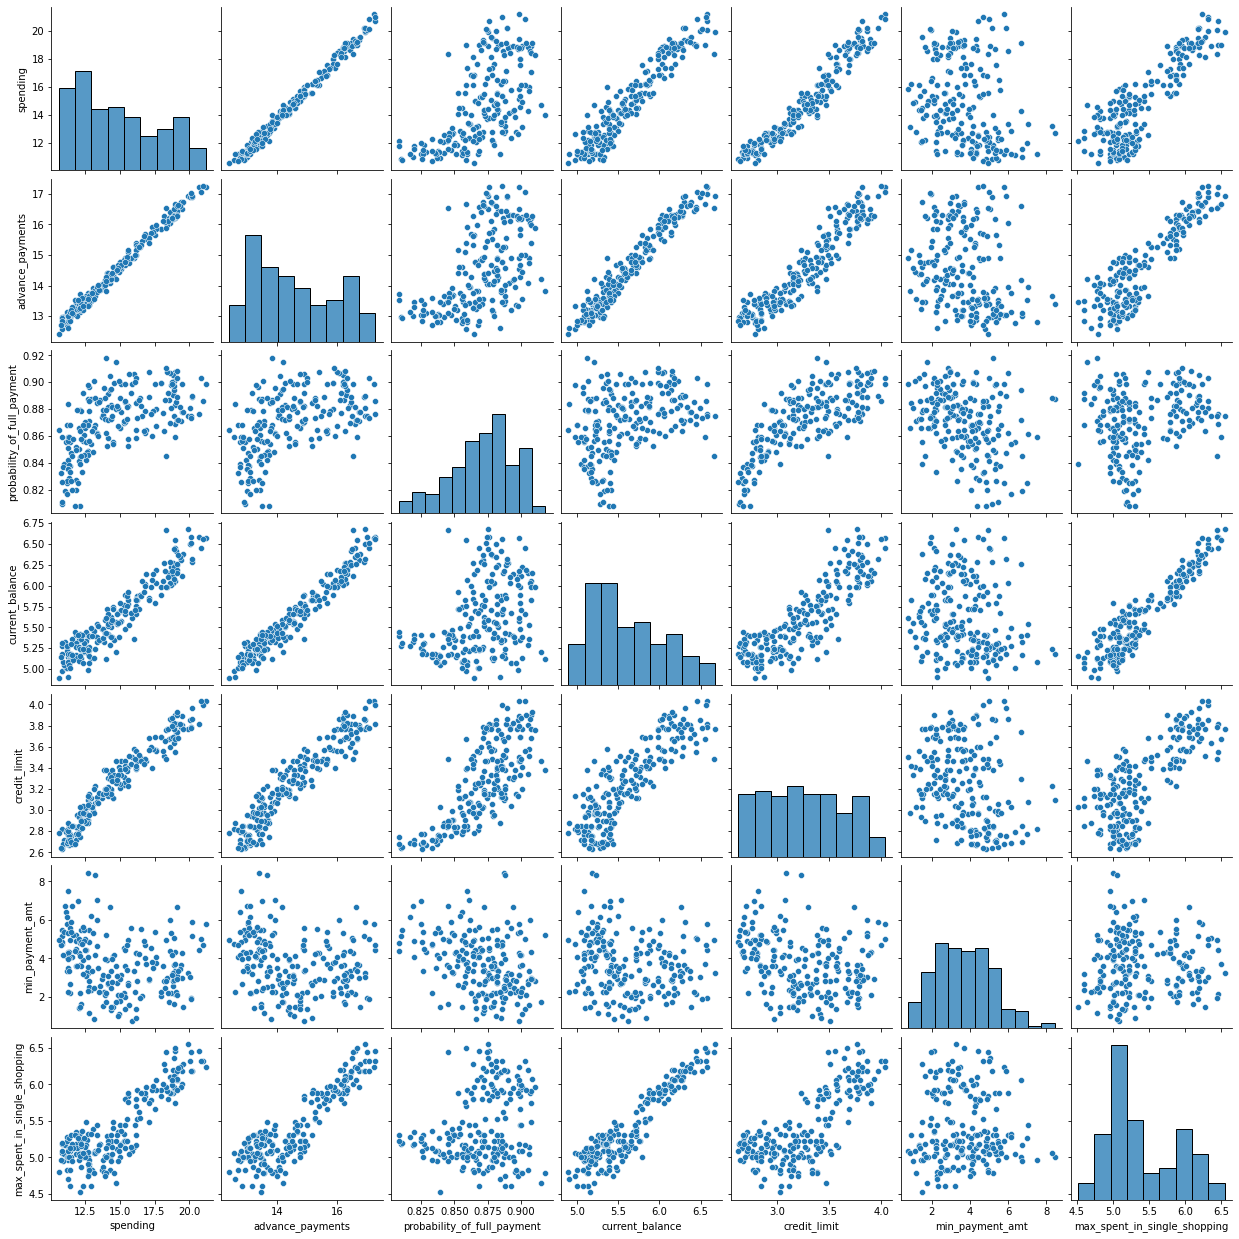

In [428]:
sns.pairplot(data=bank);

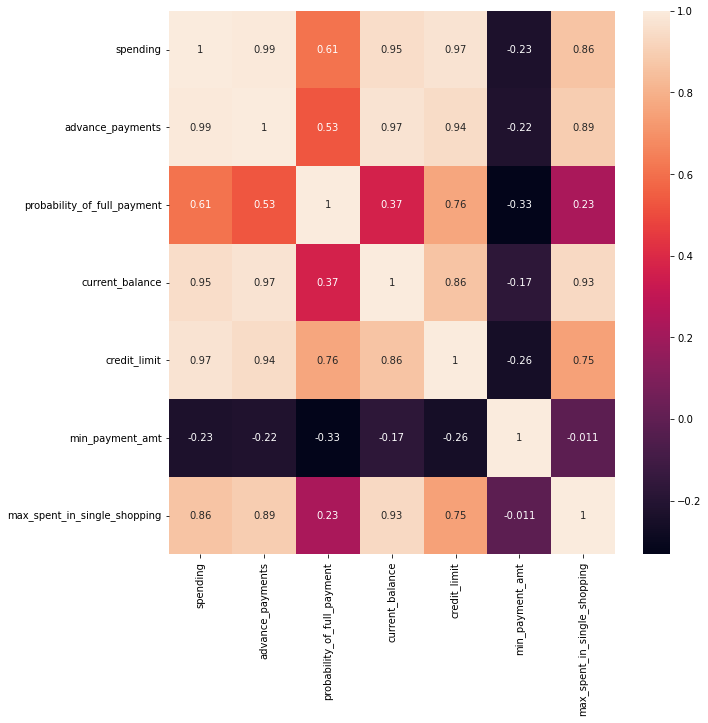

In [429]:
plt.figure(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True);

In [430]:
bank.mean()

spending                        14.847524
advance_payments                14.559286
probability_of_full_payment      0.870999
current_balance                  5.628533
credit_limit                     3.258605
min_payment_amt                  3.700201
max_spent_in_single_shopping     5.408071
dtype: float64

In [431]:
bank.std()

spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023629
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.503557
max_spent_in_single_shopping    0.491480
dtype: float64

In [432]:
from scipy.stats import zscore
bank_scaled=bank.apply(zscore)

In [433]:
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [434]:
bank_scaled.mean()

spending                        9.148766e-16
advance_payments                1.097006e-16
probability_of_full_payment     1.243978e-15
current_balance                -1.089076e-16
credit_limit                   -2.994298e-16
min_payment_amt                 5.302637e-16
max_spent_in_single_shopping   -1.935489e-15
dtype: float64

In [435]:
bank_scaled.std()

spending                        1.002389
advance_payments                1.002389
probability_of_full_payment     1.002389
current_balance                 1.002389
credit_limit                    1.002389
min_payment_amt                 1.002389
max_spent_in_single_shopping    1.002389
dtype: float64

In [436]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [437]:
link=linkage(bank_scaled,method='ward')

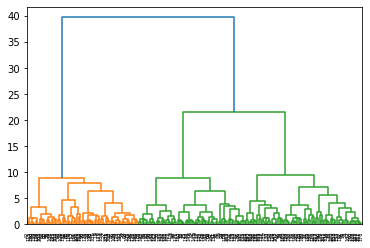

In [438]:
dend=dendrogram(link)

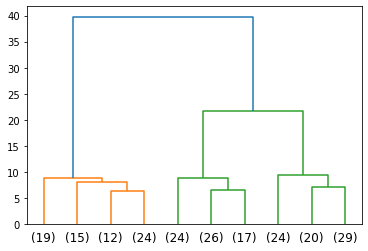

In [439]:
dend=dendrogram(link,truncate_mode='lastp',p=10)

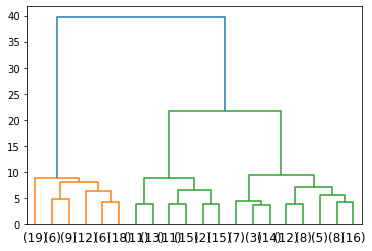

In [440]:
dend=dendrogram(link,truncate_mode='lastp',p=20)

In [441]:
from scipy.cluster.hierarchy import fcluster

In [442]:
clusters=fcluster(link,3,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [443]:
bank['clusters']=clusters

In [444]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [445]:
bank.to_csv('hc.csv')

In [446]:
bank['clusters'].value_counts()

3    73
1    70
2    67
Name: clusters, dtype: int64

In [447]:
bank['clusters'].value_counts(normalize=True)

3    0.347619
1    0.333333
2    0.319048
Name: clusters, dtype: float64

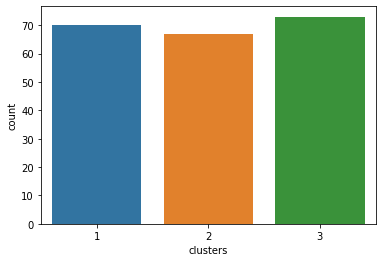

In [448]:
sns.countplot(data=bank,x='clusters');

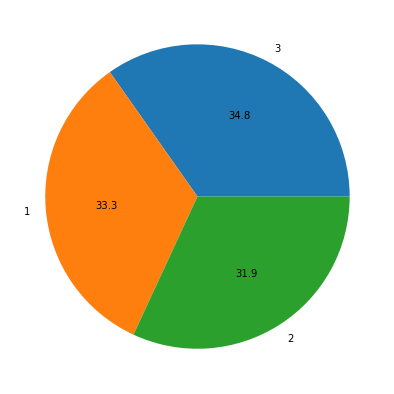

In [449]:
plt.figure(figsize=(7,7))
plt.pie(bank['clusters'].value_counts(),labels=bank['clusters'].value_counts().index,autopct='%1.1f')
plt.show()

In [450]:
for i in bank.columns:
    if i != 'clusters':
        j=bank.groupby('clusters')[i].mean()
        print(j)

clusters
1    18.371429
2    11.872388
3    14.199041
Name: spending, dtype: float64
clusters
1    16.145429
2    13.257015
3    14.233562
Name: advance_payments, dtype: float64
clusters
1    0.884400
2    0.848072
3    0.879190
Name: probability_of_full_payment, dtype: float64
clusters
1    6.158171
2    5.238940
3    5.478233
Name: current_balance, dtype: float64
clusters
1    3.684629
2    2.848537
3    3.226452
Name: credit_limit, dtype: float64
clusters
1    3.639157
2    4.949433
3    2.612181
Name: min_payment_amt, dtype: float64
clusters
1    6.017371
2    5.122209
3    5.086178
Name: max_spent_in_single_shopping, dtype: float64


In [451]:
bank.groupby('clusters').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


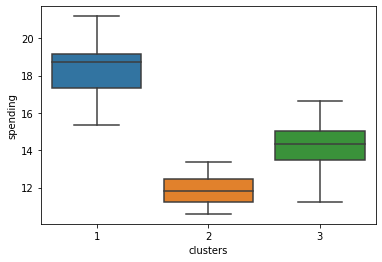

In [452]:
sns.boxplot(data=bank,x='clusters',y='spending');

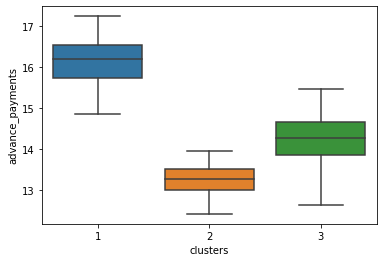

In [453]:
sns.boxplot(data=bank,x='clusters',y='advance_payments');

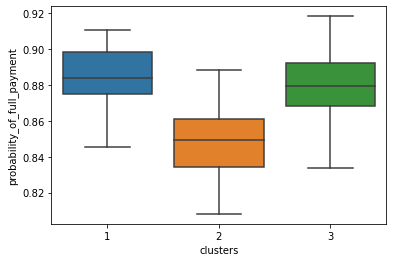

In [454]:
sns.boxplot(data=bank,x='clusters',y='probability_of_full_payment');

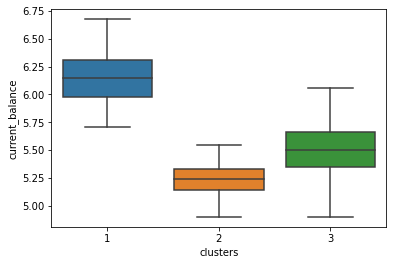

In [455]:
sns.boxplot(data=bank,x='clusters',y='current_balance');

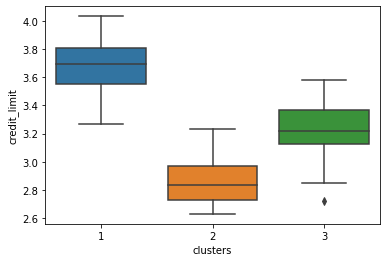

In [456]:
sns.boxplot(data=bank,x='clusters',y='credit_limit');

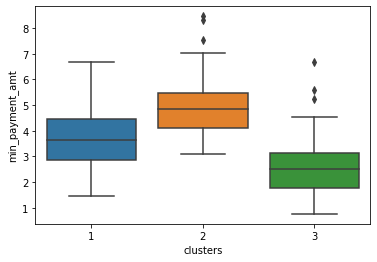

In [457]:
sns.boxplot(data=bank,x='clusters',y='min_payment_amt');

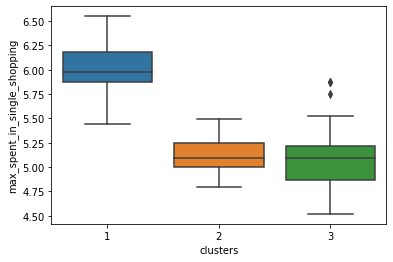

In [458]:
sns.boxplot(data=bank,x='clusters',y='max_spent_in_single_shopping');

In [459]:
from sklearn.cluster import KMeans

In [460]:
k_means=KMeans(n_clusters=1)
k_means.fit(bank_scaled)
k_means.inertia_

1469.9999999999995

In [461]:
k_means=KMeans(n_clusters=2)
k_means.fit(bank_scaled)
k_means.inertia_

659.1717544870411

In [462]:
k_means=KMeans(n_clusters=3)
k_means.fit(bank_scaled)
k_means.inertia_

430.65897315130064

In [463]:
k_means=KMeans(n_clusters=4)
k_means.fit(bank_scaled)
k_means.inertia_

371.6531439995162

In [464]:
k_means=KMeans(n_clusters=5)
k_means.fit(bank_scaled)
k_means.inertia_

327.32810941927744

In [465]:
wss=[]

In [466]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

In [467]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.38509060801107,
 326.5136953844313,
 289.33181835099384,
 262.3500269473295,
 241.9809780649388,
 226.2810875729185,
 207.75026088942425]

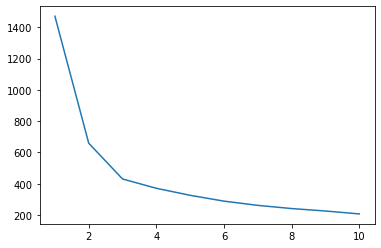

In [468]:
plt.plot(range(1,11), wss)

In [469]:
k_means=KMeans(n_clusters=3)
k_means.fit(bank_scaled)
k_means.inertia_

430.65897315130064

In [470]:
labels3=k_means.labels_

In [471]:
bank['kmeans']=labels3
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [472]:
bank['kmeans'].value_counts()

1    72
2    71
0    67
Name: kmeans, dtype: int64

In [473]:
bank['kmeans'].value_counts(normalize=True)

1    0.342857
2    0.338095
0    0.319048
Name: kmeans, dtype: float64

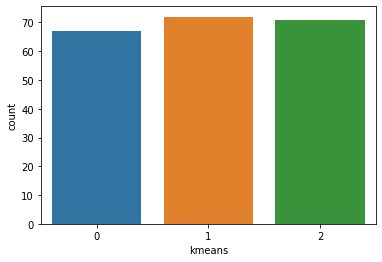

In [474]:
sns.countplot(data=bank,x='kmeans');

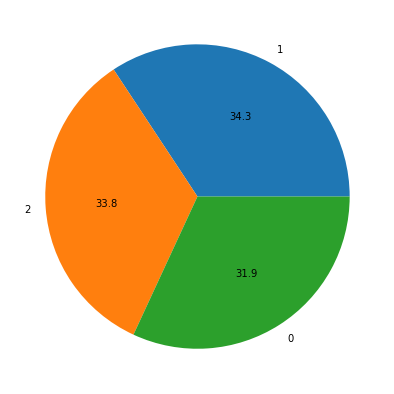

In [475]:
plt.figure(figsize=(7,7))
plt.pie(bank['kmeans'].value_counts(),labels=bank['kmeans'].value_counts().index,autopct='%1.1f')
plt.show()

In [476]:
for i in bank.columns:
    if i != 'kmeans':
        j=bank.groupby('kmeans')[i].mean()
        print(j)

kmeans
0    18.495373
1    11.856944
2    14.437887
Name: spending, dtype: float64
kmeans
0    16.203433
1    13.247778
2    14.337746
Name: advance_payments, dtype: float64
kmeans
0    0.884210
1    0.848253
2    0.881597
Name: probability_of_full_payment, dtype: float64
kmeans
0    6.175687
1    5.231750
2    5.514577
Name: current_balance, dtype: float64
kmeans
0    3.697537
1    2.849542
2    3.259225
Name: credit_limit, dtype: float64
kmeans
0    3.632373
1    4.742389
2    2.707341
Name: min_payment_amt, dtype: float64
kmeans
0    6.041701
1    5.101722
2    5.120803
Name: max_spent_in_single_shopping, dtype: float64
kmeans
0    1.029851
1    2.083333
2    2.873239
Name: clusters, dtype: float64


In [477]:
bank.groupby('kmeans').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
kmeans,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239


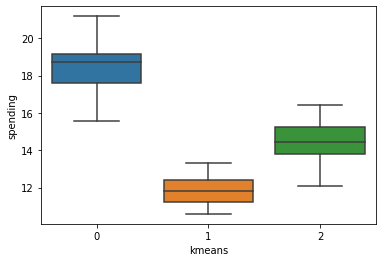

In [478]:
sns.boxplot(data=bank,x='kmeans',y='spending');

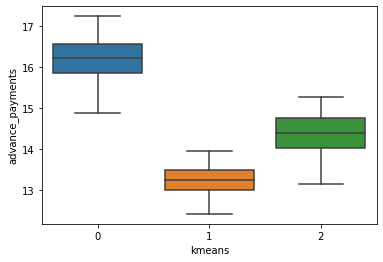

In [479]:
sns.boxplot(data=bank,x='kmeans',y='advance_payments');

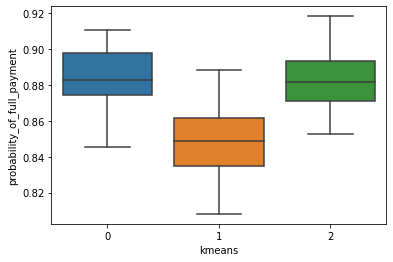

In [480]:
sns.boxplot(data=bank,x='kmeans',y='probability_of_full_payment');

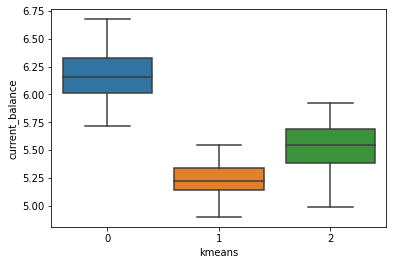

In [481]:
sns.boxplot(data=bank,x='kmeans',y='current_balance');

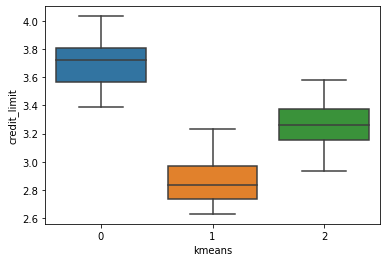

In [482]:
sns.boxplot(data=bank,x='kmeans',y='credit_limit');

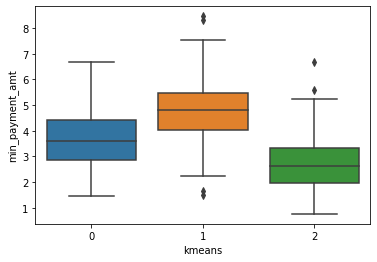

In [483]:
sns.boxplot(data=bank,x='kmeans',y='min_payment_amt');

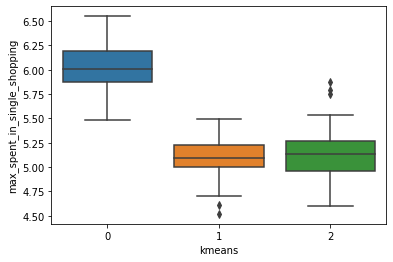

In [484]:
sns.boxplot(data=bank,x='kmeans',y='max_spent_in_single_shopping');

In [485]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [486]:
silhouette_score(bank_scaled,labels3)

0.40072705527512986

In [487]:
sil_width=silhouette_samples(bank_scaled,labels3)

In [488]:
bank['sil_width']=sil_width
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


In [489]:
silhouette_samples(bank_scaled,labels3).min()

0.002713089347678376

In [490]:
k_means=KMeans(n_clusters=2)
k_means.fit(bank_scaled)
k_means.inertia_

659.1717544870411

In [491]:
labels2=k_means.labels_

In [492]:
silhouette_score(bank_scaled,labels2)

0.46577247686580914

In [493]:
silhouette_samples(bank_scaled,labels2).min()

-0.0061712389274612344

In [494]:
k_means=KMeans(n_clusters=4)
k_means.fit(bank_scaled)
k_means.inertia_

371.18461253510196

In [495]:
labels4=k_means.labels_

In [496]:
silhouette_score(bank_scaled,labels4)

0.3347542296283261

In [497]:
silhouette_samples(bank_scaled,labels4).min()

-0.020412913640457993

In [498]:
df=pd.read_csv('insurance_part2_data.csv')

In [499]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [500]:
df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [501]:
df.shape

(3000, 10)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [503]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [504]:
dups=df.duplicated()
print('No. of duplicate records is {}'.format(dups.sum()))

No. of duplicate records is 139


In [505]:
df[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [506]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [507]:
df.describe(include='O')

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,3000,3000,3000,3000,3000,3000
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1365,1837,2076,2954,1136,2465


In [508]:
df['Duration'].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [509]:
df.Duration=df['Duration'].replace(-1,np.NaN)

In [510]:
df['Duration'].min()

0.0

In [511]:
df.Duration=df['Duration'].replace(np.NaN,0)

In [512]:
df['Duration'].describe()

count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

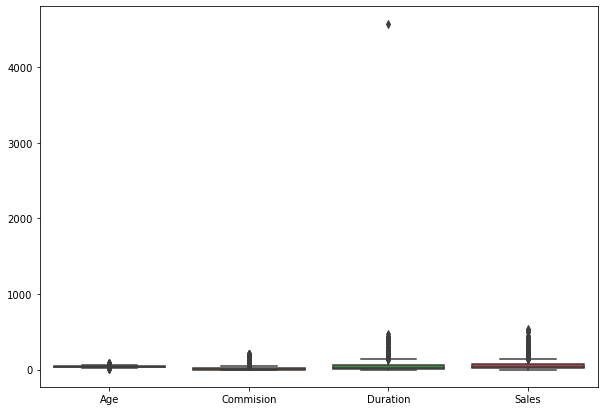

In [513]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df);

In [514]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

In [515]:
df_num.columns

Index(['Age', 'Commision', 'Duration', 'Sales'], dtype='object')

In [516]:
df_cat.columns

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [517]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 


Distribution of Age
----------------------------------------------------------------------------


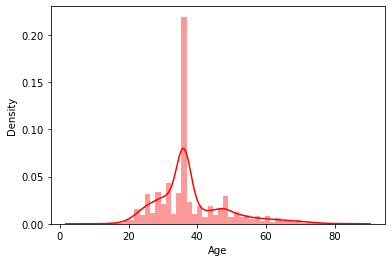

BoxPlot of Age
----------------------------------------------------------------------------


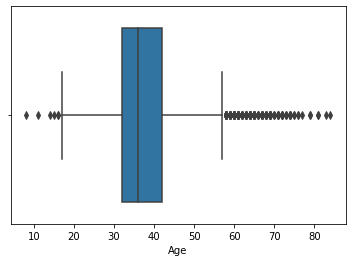

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 


Distribution of Commision
----------------------------------------------------------------------------


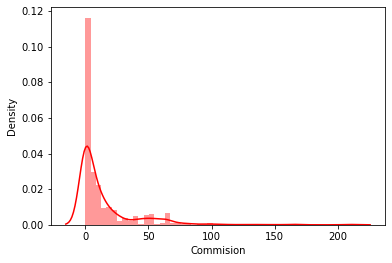

BoxPlot of Commision
----------------------------------------------------------------------------


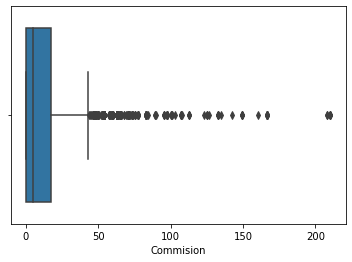

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001667
std       134.053138
min         0.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 


Distribution of Duration
----------------------------------------------------------------------------


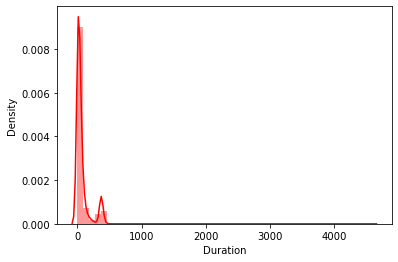

BoxPlot of Duration
----------------------------------------------------------------------------


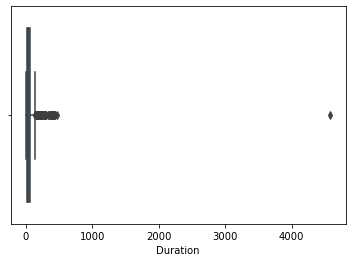

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 


Distribution of Sales
----------------------------------------------------------------------------


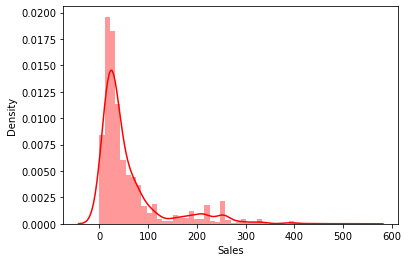

BoxPlot of Sales
----------------------------------------------------------------------------


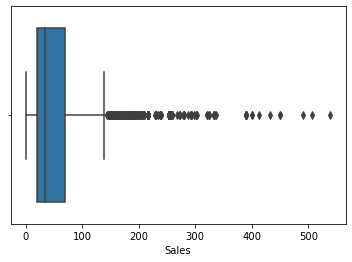

In [518]:
for i in df_num.columns:
    univariateAnalysis_numeric(i,5)

In [519]:
def univariateAnalysis_categorical(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(include='O'),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Bargraph of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(y=df[column]);
    plt.show()
    

Description of Agency_Code
----------------------------------------------------------------------------
count     3000
unique       4
top        EPX
freq      1365
Name: Agency_Code, dtype: object 


Bargraph of Agency_Code
----------------------------------------------------------------------------


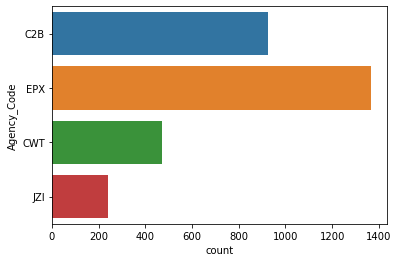

Description of Type
----------------------------------------------------------------------------
count              3000
unique                2
top       Travel Agency
freq               1837
Name: Type, dtype: object 


Bargraph of Type
----------------------------------------------------------------------------


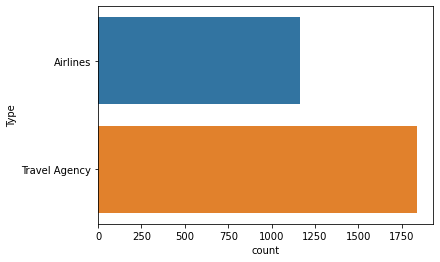

Description of Claimed
----------------------------------------------------------------------------
count     3000
unique       2
top         No
freq      2076
Name: Claimed, dtype: object 


Bargraph of Claimed
----------------------------------------------------------------------------


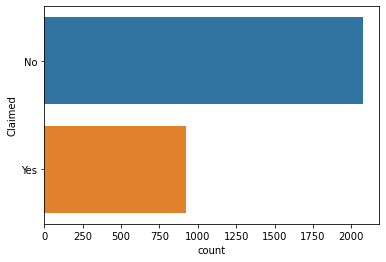

Description of Channel
----------------------------------------------------------------------------
count       3000
unique         2
top       Online
freq        2954
Name: Channel, dtype: object 


Bargraph of Channel
----------------------------------------------------------------------------


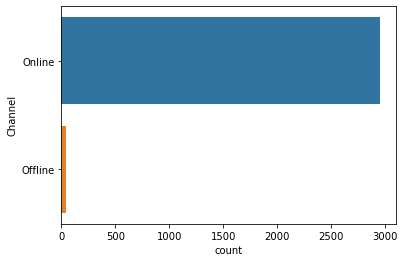

Description of Product Name
----------------------------------------------------------------------------
count                3000
unique                  5
top       Customised Plan
freq                 1136
Name: Product Name, dtype: object 


Bargraph of Product Name
----------------------------------------------------------------------------


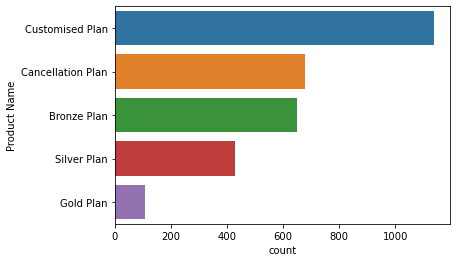

Description of Destination
----------------------------------------------------------------------------
count     3000
unique       3
top       ASIA
freq      2465
Name: Destination, dtype: object 


Bargraph of Destination
----------------------------------------------------------------------------


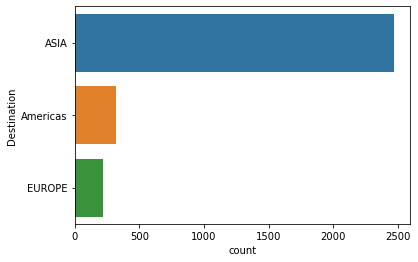

In [520]:
for i in df_cat.columns:
    univariateAnalysis_categorical(i,7)

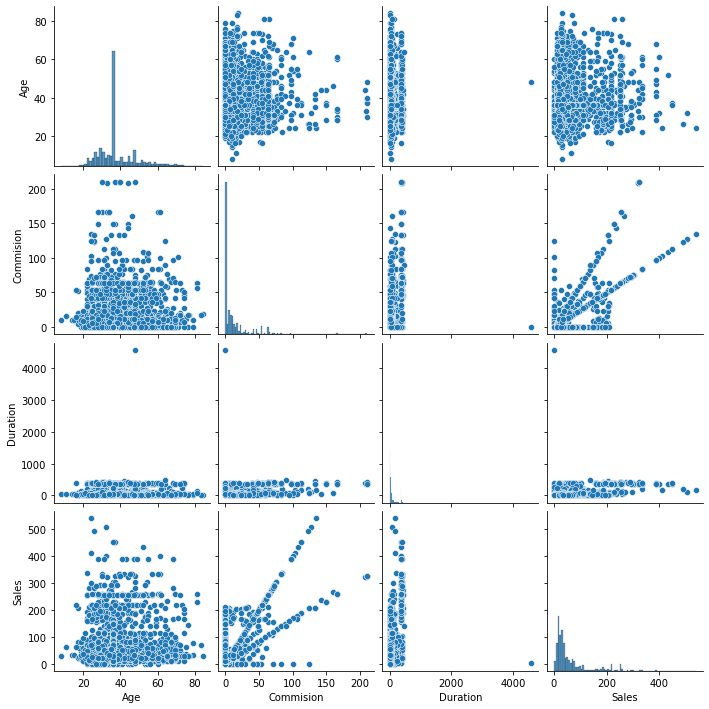

In [521]:
sns.pairplot(df);

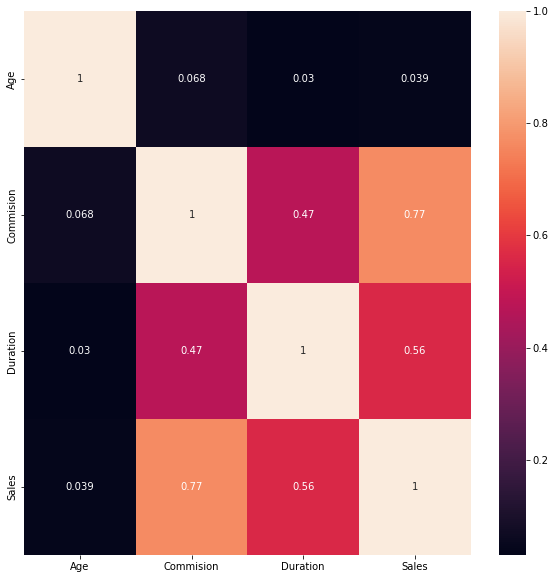

In [522]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [523]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration        float64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [524]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [525]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 111.5 KB


In [527]:
print('Agency \n',df['Agency_Code'].value_counts(normalize=True))
print('')
print('Tour Type \n',df['Type'].value_counts(normalize=True))
print('')
print('Channel \n',df['Channel'].value_counts(normalize=True))
print('')
print('Product \n',df['Product Name'].value_counts(normalize=True))
print('')
print('Destination \n',df['Destination'].value_counts(normalize=True))
print('')
print('Claimed \n',df['Claimed'].value_counts(normalize=True))

Agency 
 2    0.455000
0    0.308000
1    0.157333
3    0.079667
Name: Agency_Code, dtype: float64

Tour Type 
 1    0.612333
0    0.387667
Name: Type, dtype: float64

Channel 
 1    0.984667
0    0.015333
Name: Channel, dtype: float64

Product 
 2    0.378667
1    0.226000
0    0.216667
4    0.142333
3    0.036333
Name: Product Name, dtype: float64

Destination 
 0    0.821667
1    0.106667
2    0.071667
Name: Destination, dtype: float64

Claimed 
 0    0.692
1    0.308
Name: Claimed, dtype: float64


In [528]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [529]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [530]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [531]:
from sklearn import set_config
set_config(print_changed_only=False)

In [532]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [533]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [534]:
from sklearn import tree
train_char_labels = ['No', 'Yes']
Ins_Tree_File = open('D:\Ins_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Ins_Tree_File, feature_names = list(X_train), class_names = list(train_char_labels))

In [535]:
Ins_Tree_File.close()

In [536]:
from sklearn.model_selection import GridSearchCV

In [537]:
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_samples_leaf': [5,10,15,20,30,40,50],
    'min_samples_split': [50,100,150,200,250,300],   
}

In [538]:
dt_model = DecisionTreeClassifier(random_state = 1)

In [539]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3)

In [540]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=1, splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 30, 40, 50],
                         'min_samples_split': [50, 100, 150, 200, 250, 300

In [541]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [542]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

In [543]:
best_grid = grid_search.best_estimator_

In [544]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [545]:
ytrain_predict2 = best_grid.predict_proba(X_train)
ytest_predict2 = best_grid.predict_proba(X_test)

In [546]:
from sklearn.metrics import classification_report,confusion_matrix

In [547]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1263,  208],
       [ 227,  402]], dtype=int64)

In [548]:
confusion_matrix(test_labels, ytest_predict1)

array([[536,  69],
       [128, 167]], dtype=int64)

In [549]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1471
           1       0.66      0.64      0.65       629

    accuracy                           0.79      2100
   macro avg       0.75      0.75      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [550]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       605
           1       0.71      0.57      0.63       295

    accuracy                           0.78       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.77      0.78      0.77       900



In [551]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]

In [552]:
from sklearn.metrics import roc_auc_score

In [553]:
auc = roc_auc_score(train_labels, probs)
auc

0.8311143150188217

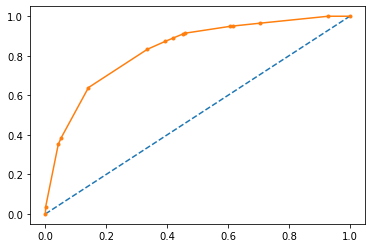

In [554]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.795


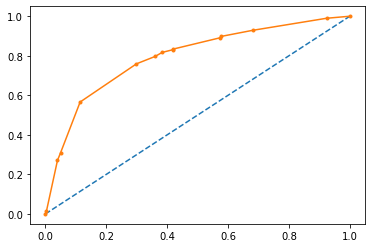

In [555]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [556]:
from sklearn.ensemble import RandomForestClassifier

In [557]:
param_grid = {
    'max_depth': [7,8,9],
    'min_samples_leaf': [3,4,5,6,],
    'min_samples_split': [10,15,20,],
    'n_estimators': [50,60,70,80,90,100,110,120]
}

In [558]:
rfcl = RandomForestClassifier(random_state=1)

In [559]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [560]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [561]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 90}

In [562]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [563]:
best_grid = grid_search.best_estimator_

In [564]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [565]:
ytrain_predict2 = best_grid.predict_proba(X_train)
ytest_predict2 = best_grid.predict_proba(X_test)

In [566]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1339,  132],
       [ 236,  393]], dtype=int64)

In [567]:
confusion_matrix(test_labels, ytest_predict1)

array([[551,  54],
       [153, 142]], dtype=int64)

In [568]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1471
           1       0.75      0.62      0.68       629

    accuracy                           0.82      2100
   macro avg       0.80      0.77      0.78      2100
weighted avg       0.82      0.82      0.82      2100



In [569]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [570]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]

In [571]:
auc = roc_auc_score(train_labels, probs)
auc

0.8863350694238046

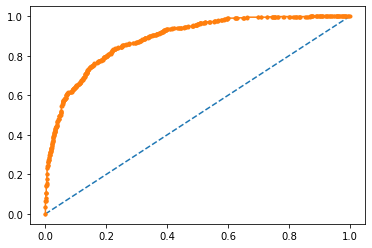

In [572]:
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.821


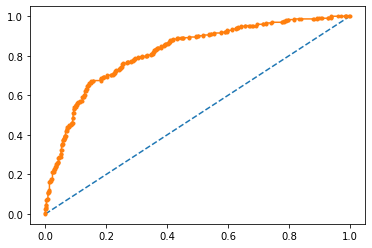

In [573]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [574]:
from sklearn.neural_network import MLPClassifier

In [575]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [576]:
X_train = sc.fit_transform(X_train)
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [577]:
X_test = sc.transform(X_test)
X_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [578]:
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [500]
}

In [579]:
clf = MLPClassifier(random_state=1)

In [580]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3)

In [581]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             n_jobs=None,
             param_grid={'activation': ['logi

In [582]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [583]:
grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [584]:
best_grid = grid_search.best_estimator_

In [585]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

In [586]:
ytrain_predict2 = best_grid.predict_proba(X_train)
ytest_predict2 = best_grid.predict_proba(X_test)

In [587]:
confusion_matrix(train_labels, ytrain_predict1)

array([[1318,  153],
       [ 304,  325]], dtype=int64)

In [588]:
confusion_matrix(test_labels, ytest_predict1)

array([[557,  48],
       [164, 131]], dtype=int64)

In [589]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.68      0.52      0.59       629

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [590]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.44      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.75       900



In [591]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
auc

0.8281005642744356

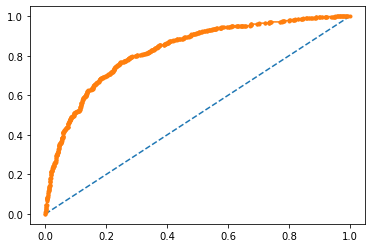

In [592]:
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.810


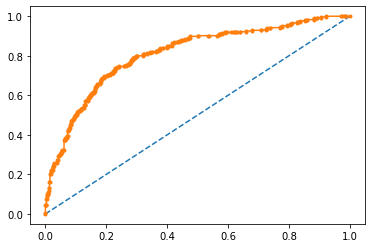

In [593]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()